In [172]:
import matplotlib.pyplot as plt
import os
import random
import numpy as np

In [104]:
ROOT_DIR = "/home/tensor/datasets/cityscape"

TRAIN_DIR = ROOT_DIR + '/leftImg8bit/train'
TEST_DIR = ROOT_DIR + '/leftImg8bit/test'
VAL_DIR = ROOT_DIR + '/leftImg8bit/val'

TRAIN_MASK_DIR = ROOT_DIR + "/gtFine/train"
VAL_MASK_DIR = ROOT_DIR + "/gtFine/val"
TEST_MASK_DIR = ROOT_DIR + "/gtFine/test"

In [168]:
def extract_image_path(root_dir):
    images = []
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if '.png' in file:
                images.append(os.path.join(root, file))
    return images

def extract_mask_path(root_dir):
    masks = []
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if '.png' in file and 'labelIds':
                masks.append(os.path.join(root, file))
    return masks

def plot_multiple_random_img(img_path, row=2, col=2):
    fig, ax = plt.subplots(row, col)
    fig.set_size_inches(15,10)
    random.shuffle(img_path)
    for i in range(row):
        for j in range(col):
            img = plt.imread(img_path[i+j])
            ax[i][j].imshow(img)
    fig.suptitle("Random train images from the dataset")
    fig.tight_layout()
    return fig

def plot_image_mask_overlay(img_path, mask_path, mask_file_meta='gtFine_labelIds.png', examples=3):
    image_plots = 2
    fig, ax = plt.subplots(examples, image_plots)
    random.shuffle(img_path)
    images = img_path[:9]
    masks = []

    for image in images:
        dir, file = image.split("/")[-2:]
        mask_file = "_".join(file.split('_')[:-1]) + "_{}".format(mask_file_meta)
        masks.append(os.path.join(mask_path, os.path.join(dir, mask_file)))

    idx_count = 0
    for i in range(examples):

        for j in range(image_plots):
            idx = idx_count + j
            img = plt.imread(image[idx])
            mask = plt.imread(mask_file[idx])

            ax[i][0].imshow(img)
            ax[i][1].imshow(mask)
            
            fig.suptitle("Random train images and mask from the dataset")
            fig.tight_layout()
        
        idx_count += image_plots
    # fig, ax = plt.subplots(3, 3)
    # for root, dirs, files in os.walk(root_dir):



In [166]:
train_images = extract_image_path(TRAIN_DIR)
train_masks = extract_mask_path(TRAIN_MASK_DIR)

In [169]:
plot_image_mask_overlay(train_images, TRAIN_MASK_DIR)

ValueError: Illegal argument(s) to subplot: (3, 2)

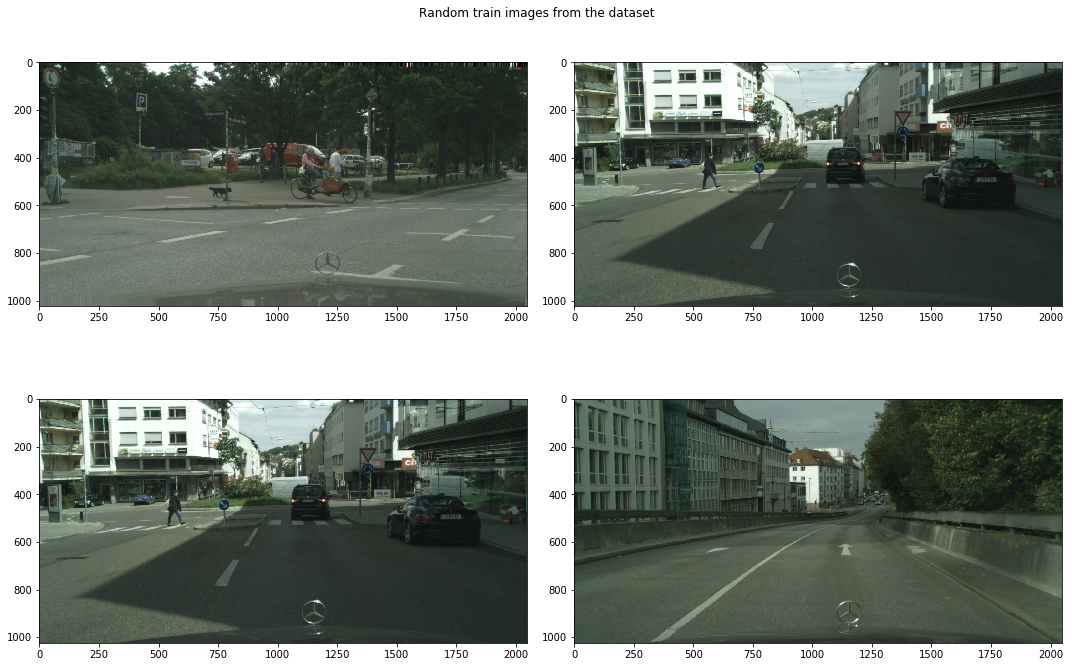

In [128]:
fig = plot_multiple_random_img(train_images)

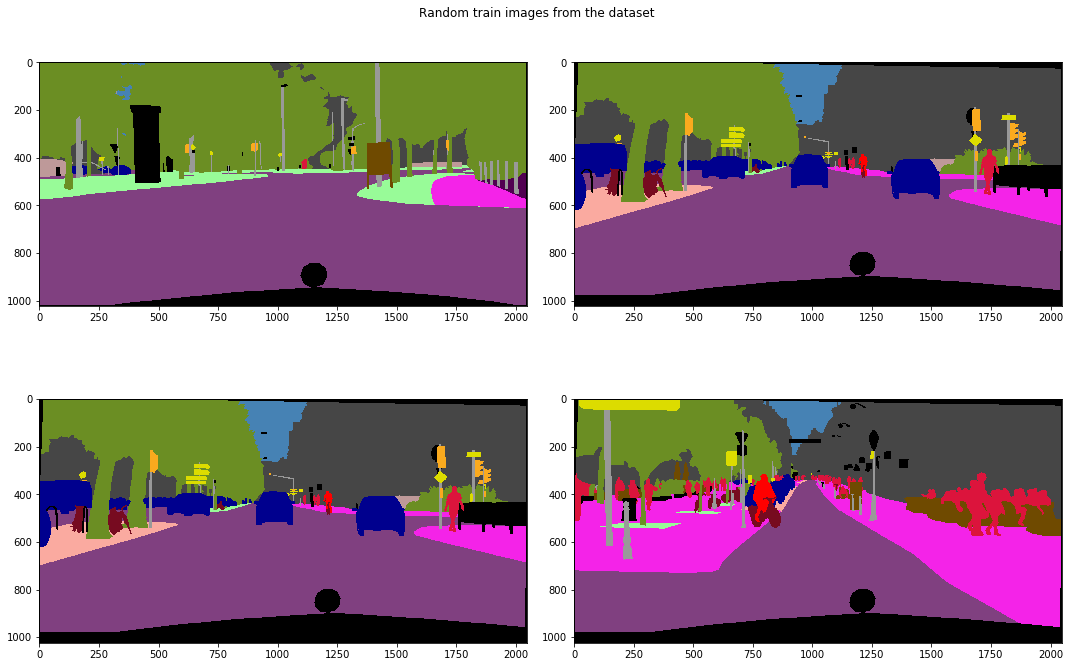

In [129]:
fig = plot_multiple_random_img(train_masks)

In [175]:
img_mask = train_masks[0]
img = plt.imread(img_mask)


[[0.01176471 0.01176471 0.01176471 ... 0.01176471 0.01176471 0.01176471]
 [0.01176471 0.01176471 0.01176471 ... 0.01176471 0.01176471 0.01176471]
 [0.01176471 0.01176471 0.01176471 ... 0.01176471 0.01176471 0.01176471]
 ...
 [0.01176471 0.01176471 0.01176471 ... 0.01176471 0.01176471 0.01176471]
 [0.01176471 0.01176471 0.01176471 ... 0.01176471 0.01176471 0.01176471]
 [0.01176471 0.01176471 0.01176471 ... 0.01176471 0.01176471 0.01176471]]
